# CS 513 - HW2
### Hogan Lin
### hlin31@stevens.edu

1. Load data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = "./breast-cancer-wisconsin.csv"
df = pd.read_csv(filename, na_values=['?'])

print("First 5 rows:")
display(df.head())

First 5 rows:


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


I. Summarize each column

In [18]:
print("Summary Statistics:")
display(df.describe(include='all'))

print("\nMin/Max/Mean for numeric columns:")
display(df.describe().loc[['min', 'max', 'mean']])

Summary Statistics:


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000



Min/Max/Mean for numeric columns:


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
min,6.163400e+04,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.345435e+07,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
mean,1.071704e+06,4.41774,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557


II. Identify missing values

In [19]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

III. Replace missing with mean 

In [20]:
dfImputed = df.copy()
for col in dfImputed.columns:
    if dfImputed[col].dtype in [np.int64, np.float64]:
        meanVal = dfImputed[col].mean()
        dfImputed[col] = dfImputed[col].fillna(round(meanVal))

print("Missing values after imputation:")
display(dfImputed.isnull().sum())

Missing values after imputation:


Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [21]:
print("Frequency Table (Class vs. F6):")
freqTable = pd.crosstab(dfImputed['Class'], dfImputed['F6'])
display(freqTable)

Frequency Table (Class vs. F6):


F6,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Class,,,,,,,,,,
2,387,21,14,20,10,0,1,2,0,3
4,15,9,14,15,20,4,7,19,9,129


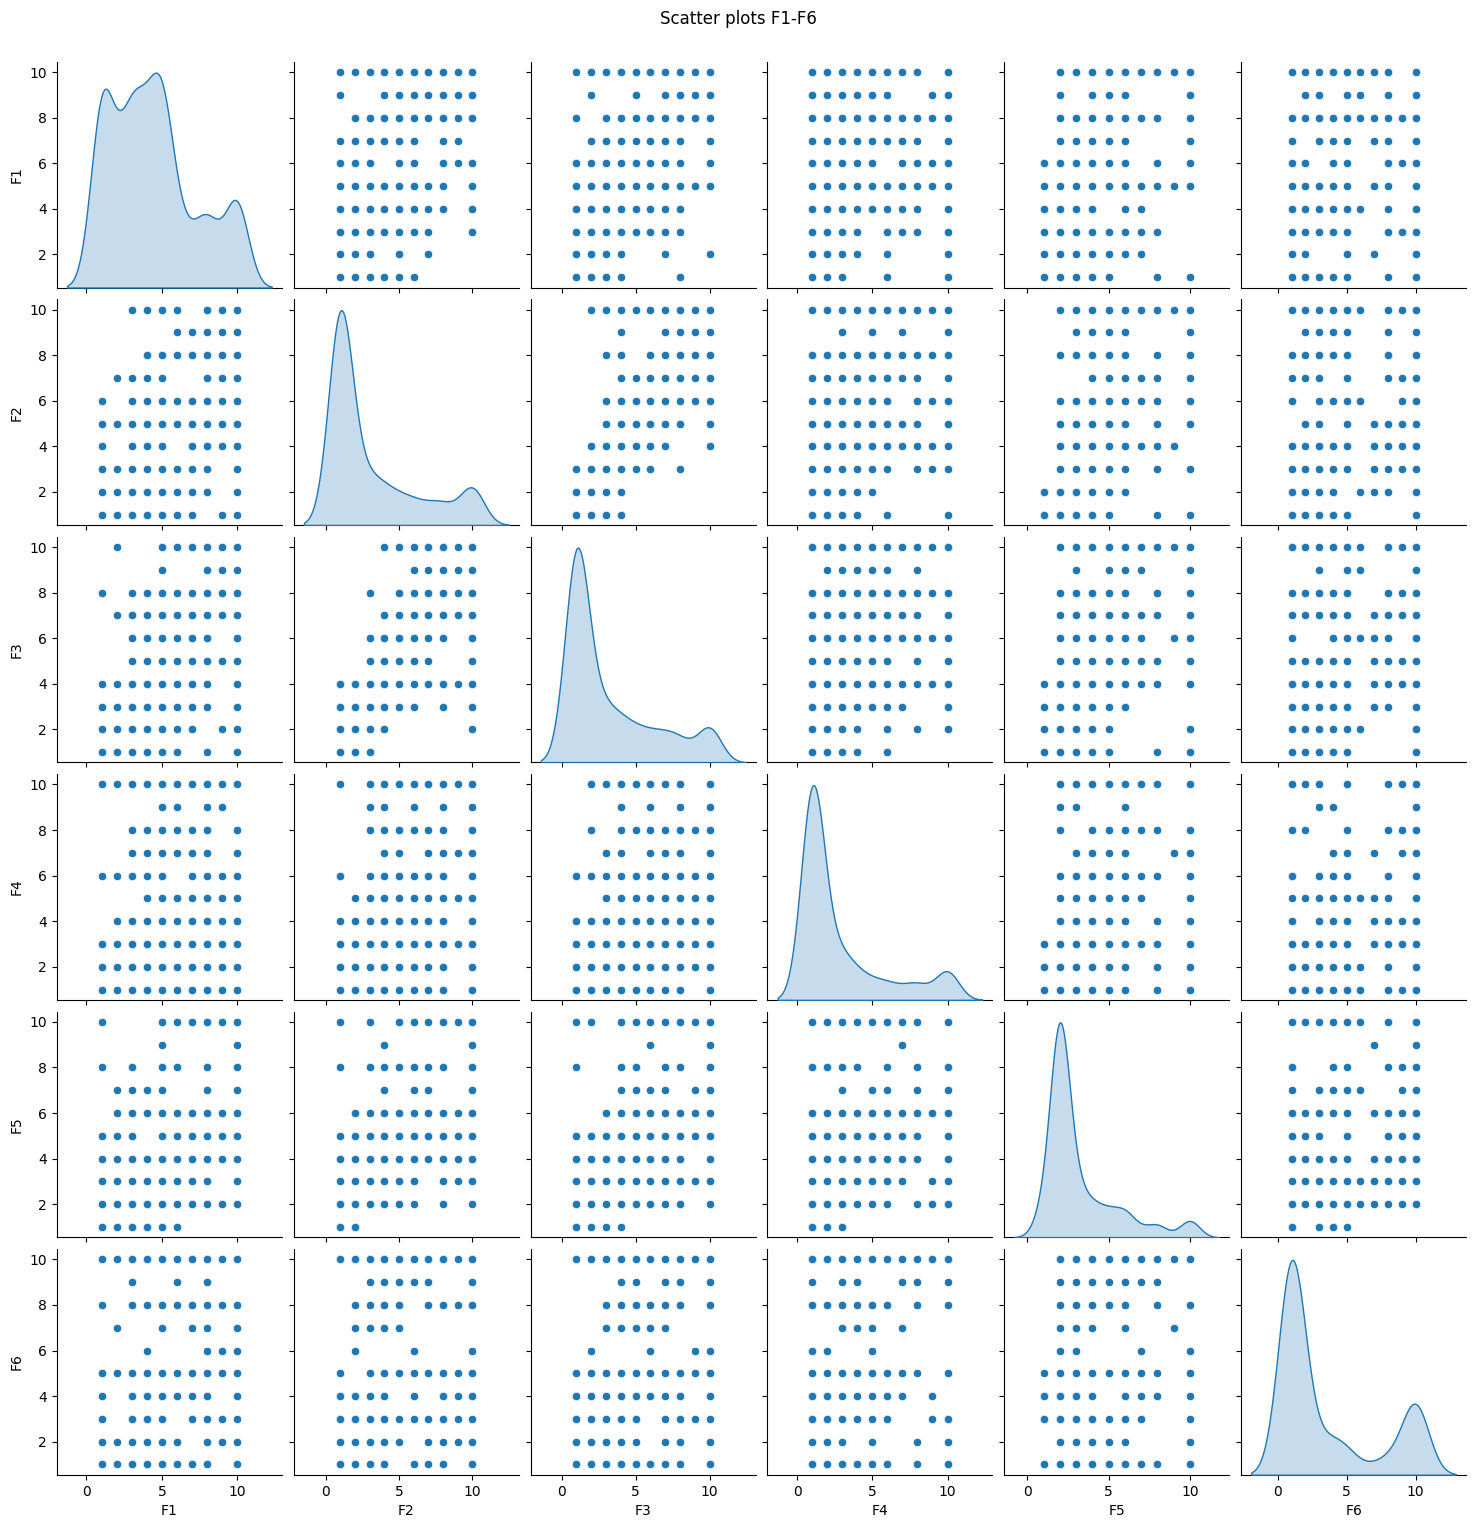

In [22]:
# ---------- V. Scatter plots F1 to F6 ----------
sns.pairplot(dfImputed[['F1','F2','F3','F4','F5','F6']], diag_kind="kde")
plt.suptitle("Scatter plots F1-F6", y=1.02)
plt.show()

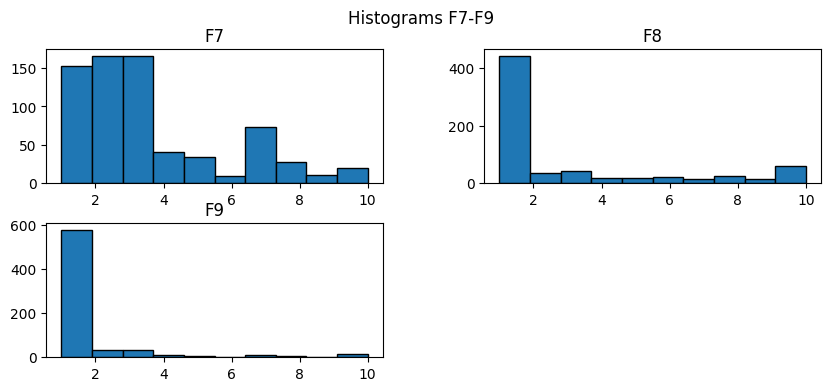

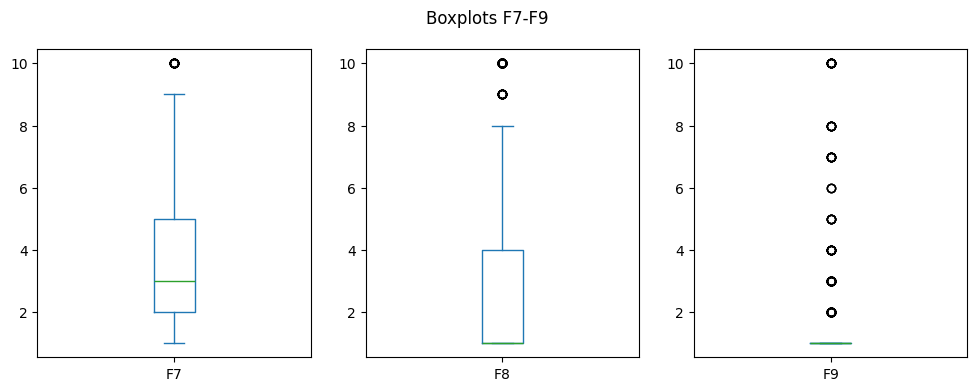

In [23]:
subset = dfImputed[['F7','F8','F9']]

subset.hist(grid=False, bins=10, edgecolor="black", figsize=(10,4))
plt.suptitle("Histograms F7-F9")
plt.show()

subset.plot(kind="box", subplots=True, layout=(1,3), figsize=(12,4), sharey=False)
plt.suptitle("Boxplots F7-F9")
plt.show()

In [24]:
dfClean = pd.read_csv(filename, na_values=['?'])

print("Shape before dropping missing:", dfClean.shape)
display(dfClean.isnull().sum())

dfClean.dropna(inplace=True)

print("Shape after dropping missing:", dfClean.shape)
display(dfClean.isnull().sum())

Shape before dropping missing: (699, 11)


Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

Shape after dropping missing: (683, 11)


Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64